## MNIST database
Modified National Institute of Standards and Technology database is a large database of handwritten digits. Each image is 28 x 28 pixels for 784 features.

A place to check out a great overview of NNs: https://www.3blue1brown.com/topics/neural-networks and go over a digit classification example


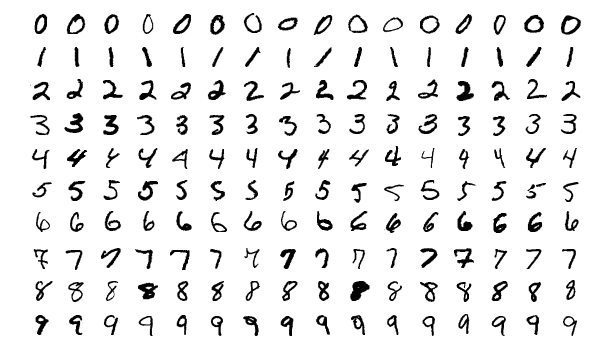

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import log_loss

In [2]:
X,y = fetch_openml("mnist_784", version=1, return_X_y=True)
X = X /255.0 #Black and white Image. Lets rescale between 0 & 1

In [3]:
print('There are ' + str(X.shape[0]) + ' samples with ' + str(X.shape[1]) + ' features' )

print('There are ' + str(len(np.unique(y))) + ' classes: ' )
np.unique(y)

There are 70000 samples with 784 features
There are 10 classes: 


array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [4]:
#Lets cut out some data bc it takes a while to work with a ton of samples
Xless = X[:2000,:]
yless = y[:2000]

Lets look at some example digits

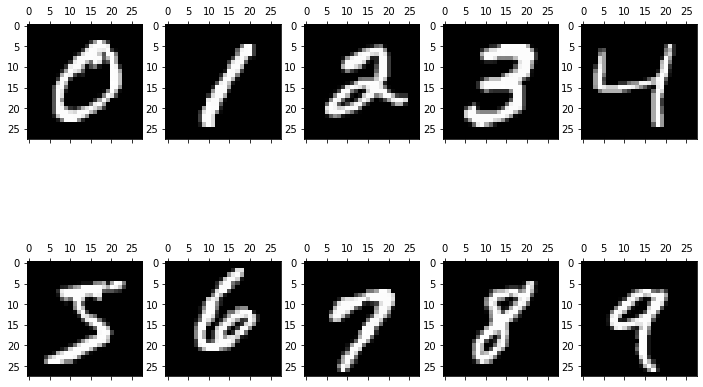

In [5]:
fig,ax = plt.subplots(2,5,figsize=(12,8))
ax = np.reshape(ax,10)
for cnt, target in enumerate(np.unique(y)):
    ind_target = np.where(y==target)[0][0]
    ax[cnt].matshow(X[ind_target,:].reshape(28,28),cmap=plt.cm.gray)


### Split data into test and train

In [6]:
X_train, X_test, y_train, y_test = train_test_split(Xless, yless, train_size=0.70)


In [56]:
clf = MLPClassifier(hidden_layer_sizes=(36), max_iter = 100, alpha = 20)
clf.fit(X_train,y_train)

/home/ravinderjit/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(alpha=20, hidden_layer_sizes=36, max_iter=100)

In [57]:
score_train = clf.score(X_train,y_train) * 100
score_test = clf.score(X_test,y_test) * 100

print('Test accuracy: ' + str(round(score_test*10)/10) + '\nTrain accuracy: ' + str(round(score_train*10)/10) + '%')

Test accuracy: 83.8
Train accuracy: 87.3%


### Lets get a sense of what this NN is doing by looking at the weights in the network

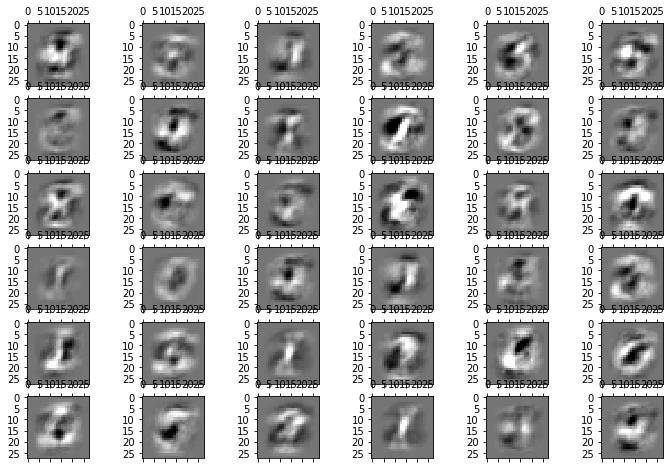

In [58]:
vmin, vmax = clf.coefs_[0].min(), clf.coefs_[0].max()
fig,ax = plt.subplots(6,6,figsize=(12,8))
ax = np.reshape(ax,ax.size)
for cnt in range(ax.size):
    ax[cnt].matshow(clf.coefs_[0][:,cnt].reshape(28,28),cmap=plt.cm.gray, vmin = vmin*0.5, vmax = vmax*0.5)



### Now lets look at the weights going to the output layer

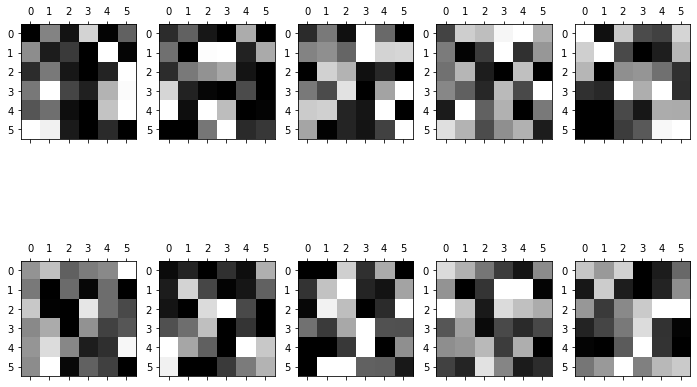

In [59]:
vmin, vmax = clf.coefs_[1].min(), clf.coefs_[1].max()
fig,ax = plt.subplots(2,5,figsize=(12,8))
ax = np.reshape(ax,ax.size)
for cnt in range(ax.size):
    ax[cnt].matshow(clf.coefs_[1][:,cnt].reshape(6,6),cmap=plt.cm.gray, vmin = vmin*0.5, vmax = vmax*0.5)


### Lets plot the performance of the network over iterations 

Text(0, 0.5, 'Cost')

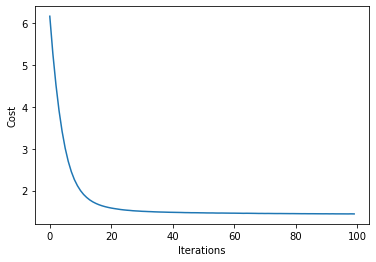

In [65]:
plt.figure()
plt.plot(clf.loss_curve_)
plt.xlabel('Iterations')
plt.ylabel('Cost')

### Lets modify how we call the MLPclassifier to look at performance on the training and test data over iterations

/home/ravinderjit/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


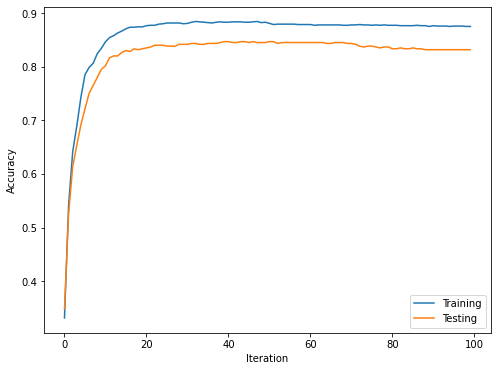

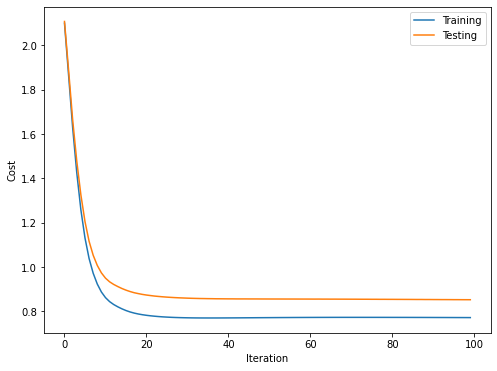

In [124]:
iterations = 100
alpha = 20
train_acc = np.zeros(iterations)
test_acc = np.zeros(iterations)
test_loss = np.zeros(iterations)
train_loss = np.zeros(iterations)
labels = np.unique(y).astype('int')

clf = MLPClassifier(hidden_layer_sizes=(36),max_iter = 1, alpha = alpha, warm_start=True, random_state=4)
for k in range(100):
    clf.fit(X_train,y_train)
    train_acc[k] = clf.score(X_train,y_train) 
    test_acc[k] = clf.score(X_test,y_test) 
    test_loss[k] = log_loss(y_test.astype('int'),clf.predict_proba(X_test),labels=labels) ### Note didn't include regularization term
    train_loss[k] = log_loss(y_train.astype('int'),clf.predict_proba(X_train),labels=labels) ### Note didn't include regularization term
    
    
plt.figure(figsize=(8,6))
plt.plot(train_acc, label='Training')
plt.plot(test_acc, label = 'Testing')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.legend()

plt.figure(figsize=(8,6))
plt.plot(train_loss, label='Training')
plt.plot(test_loss, label='Testing')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.legend()